# UMAPs Neurips samples, NK cells

EG37, EG44, EG45, EG48, EG49, EG50, EG51, EG52, EG53, EG59, EG60, EG61, EG62, EG63 are AML cases.

In this notebook samples are merged together, after which NK cell cluster is defined and NK cells are selected for further analysis. All UMAPs are generated based on latent space coordinates. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap
import textwrap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#Easigenomics dataset, only one sample

adata_merged = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/AML_norm.h5ad')

In [3]:
adata_merged.obs['cell_type']

AAACGGGTCTTCTGGC-1-117         NKT
AAAGATGTCCTCCTAG-1-117    leukemic
AACCATGAGCCACTAT-1-117    leukemic
AAGCCGCCATGGTCAT-1-117    leukemic
AAGGAGCAGCGCTTAT-1-117         NKT
                            ...   
TTTGTCACAATCGGTT-1-130    leukemic
TTTGTCACACGAGGTA-1-130    leukemic
TTTGTCAGTATAGGTA-1-130    leukemic
TTTGTCAGTCGATTGT-1-130    leukemic
TTTGTCATCTTCGAGA-1-130    leukemic
Name: cell_type, Length: 26365, dtype: category
Categories (6, object): ['NKT', 'leukemic', 'leukemic?', 'non-leukemic', 'non-leukemic?', 'unknown']

In [4]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata_merged, use_rep="X_totalVI")    

sc.tl.umap(adata_merged)

In [5]:
adata_merged.X

<26365x7277 sparse matrix of type '<class 'numpy.float32'>'
	with 55184841 stored elements in Compressed Sparse Row format>

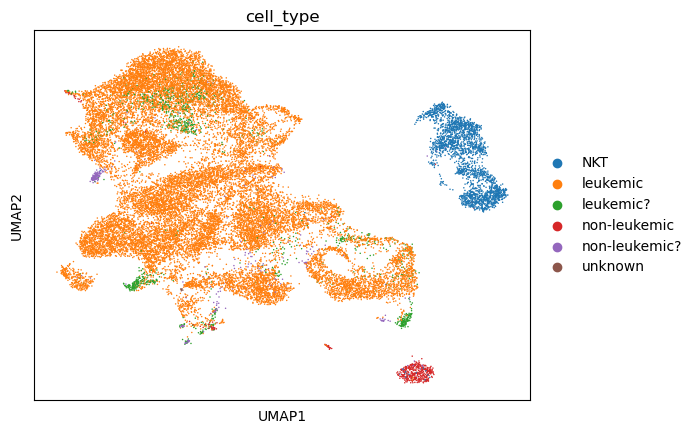

In [6]:
sc.pl.umap(adata_merged, color = ['cell_type'], color_map = 'viridis')

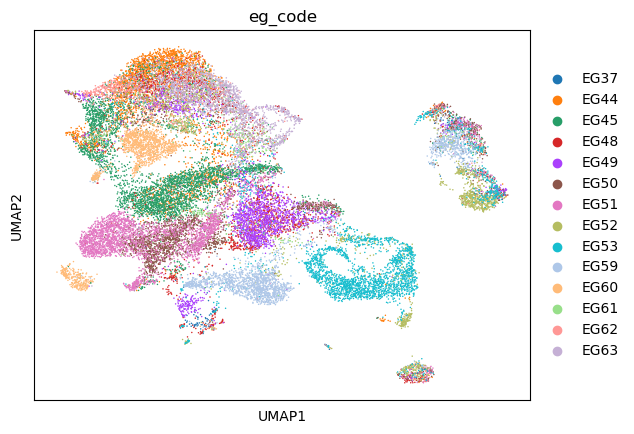

In [7]:
sc.pl.umap(adata_merged, color = ['eg_code'], color_map = 'viridis')

In [8]:
#To find gene names

#result = [i for i in adata_neurips.var_names if i.startswith('TC')]
#print(result)

In [9]:
sc.tl.leiden(adata_merged, resolution = 1, key_added = "leiden_1")

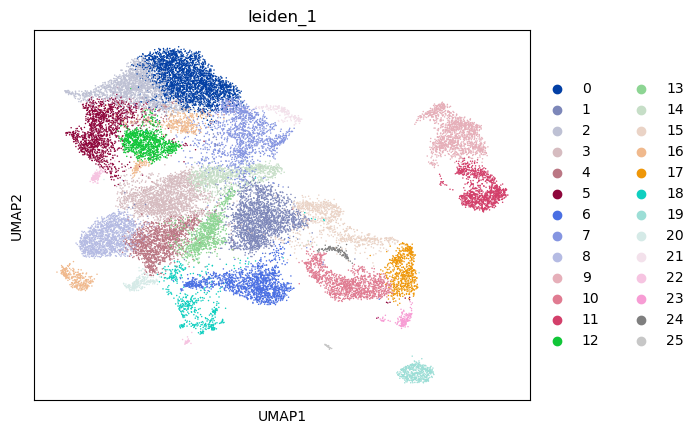

In [10]:
sc.pl.umap(adata_merged, color=['leiden_1'], ncols =3)

- Based on protein + RNA marker expression cluster 9 can be identified as NK cells. 


In [11]:
#selecting NK cell cluster
adata_nk = adata_merged[adata_merged.obs['leiden_1'] == "9"]

In [12]:
adata_nk

View of AnnData object with n_obs × n_vars = 1383 × 7277
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-10', 'highly_variable-10', 'means-10', 'dispersions

In [13]:
#calculating neigbors for object containing only NK cells, based on latent space

sc.pp.neighbors(adata_nk, use_rep="X_totalVI")

sc.tl.umap(adata_nk)

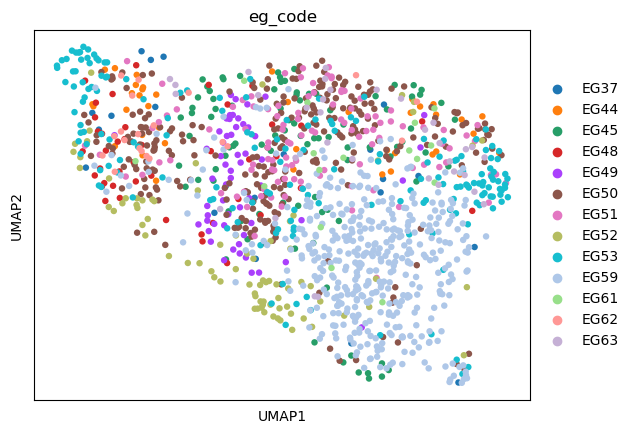

In [14]:
sc.pl.umap(adata_nk, color = ["eg_code"])

In [15]:
#Calculating leidens for latent object
sc.tl.leiden(adata_nk, resolution = 0.4, key_added = "leiden_0.4")

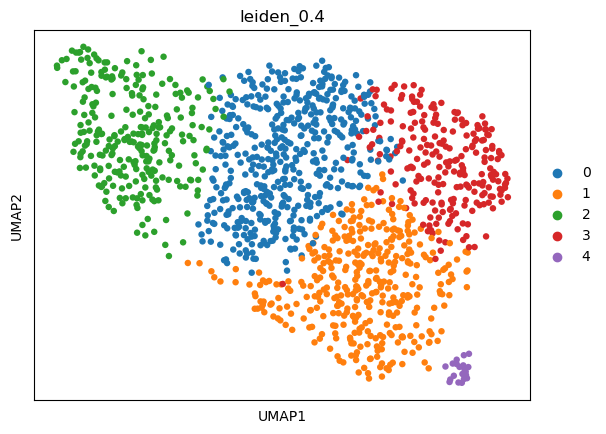

In [16]:
sc.pl.umap(adata_nk, color=['leiden_0.4'], ncols =3)

In [17]:
#Removing mitochondrial and ribosomal genes

#genes to be removed
mito_genes = adata_nk.var_names.str.startswith('MT-')
ribo_genes = adata_nk.var_names.str.startswith('RPL')
ribo_genes1 = adata_nk.var_names.str.startswith('RPS')

remove = np.add(mito_genes, ribo_genes)
remove = np.add(remove, ribo_genes1)

#other genes kept
keep = np.invert(remove)

adata_nk = adata_nk[:,keep]

#print(adata_gex.n_obs, adata_gex.n_vars)

In [18]:
adata_nk

View of AnnData object with n_obs × n_vars = 1383 × 7175
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1', 'leiden_0.4'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-10', 'highly_variable-10', 'means-10'

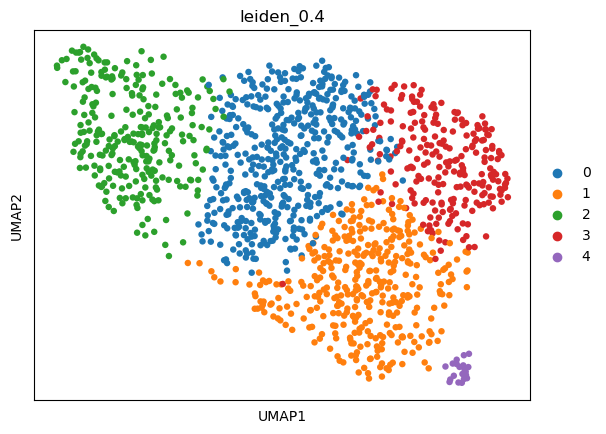

In [19]:
sc.pl.umap(adata_nk, color=['leiden_0.4'], ncols =3)

sc.tl.rank_genes_groups(adata_nk, 'leiden_0.4', method="t-test", key_added="t-test")
#sc.pl.rank_genes_groups(adata_nk, n_genes=25, sharey=False, ncols=2)

## GSEA using decoupler

In [20]:
adata_nk.uns['t-test']

{'params': {'groupby': 'leiden_0.4',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('CD52', 'MALAT1', 'TYROBP', 'JUNB', 'MALAT1'),
            ('S100A4', 'FLNA', 'FCER1G', 'FOS', 'TNFAIP3'),
            ('GNLY', 'COTL1', 'CD7', 'JUN', 'NEAT1'), ...,
            ('DUSP2', 'HLA-B', 'COTL1', 'EFHD2', 'NDUFB2'),
            ('CEBPD', 'HOPX', 'CLEC2D', 'GPR56', 'COX6B1'),
            ('FCER1G', 'JUN', 'CD52', 'GNLY', 'TOMM7')],
           dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O')]),
 'scores': rec.array([( 17.065271,  13.1954  ,  35.057194,  18.332058,   8.632284 ),
            ( 15.425539,   9.324639,  23.37019 ,  17.215755,   6.419115 ),
            ( 14.320403,   8.781223,  21.176996,  15.766368,   5.0478377),
            ...,
            ( -9.882405, -14.933335, -11.210747, -12.574954, -39.21208  ),
            ( -9.919386, -16.563606, -11.636511, -12.947081, -47.6637

In [21]:
gene_scores= pd.DataFrame(adata_nk.uns['t-test']['names'])

gene_scores

,0,1,2,3,4
0,CD52,MALAT1,TYROBP,JUNB,MALAT1
1,S100A4,FLNA,FCER1G,FOS,TNFAIP3
2,GNLY,COTL1,CD7,JUN,NEAT1
3,B2M,TNFAIP3,GNLY,DUSP1,MACF1
4,HLA-C,AHNAK,IFITM2,JUND,LINC-PINT
...,...,...,...,...,...
7170,MALAT1,CD7,VIM,NKG7,NDUFB9
7171,TYROBP,NFKBIA,TNFAIP3,FCER1G,RABAC1
7172,DUSP2,HLA-B,COTL1,EFHD2,NDUFB2
7173,CEBPD,HOPX,CLEC2D,GPR56,COX6B1


In [22]:
sub_population = "0"

In [23]:
# extract scores
t_stats = (
    # Get dataframe of DE results for condition vs. rest
    sc.get.rank_genes_groups_df(adata_nk, sub_population, key="t-test")
    # Subset to highly variable genes
    .set_index("names")
    #.loc[adata.var["highly_variable"]]
    # Sort by absolute score
    .sort_values("scores", key=np.abs, ascending=False)
    # Format for decoupler
    [["scores"]]
    .rename_axis(["Cluster 1"], axis=1)
)
t_stats

Cluster 1,scores
names,
CD52,17.065271
S100A4,15.425539
GNLY,14.320403
FCER1G,-13.889450
B2M,13.769478
...,...
KBTBD3,0.000796
GALNT1,0.000298
NAPEPLD,-0.000295


In [24]:
!pip install decoupler

In [25]:
import decoupler as decoupler

In [26]:
# Downloading reactome pathways
from pathlib import Path

if not Path("c2.cp.reactome.v7.5.1.symbols.gmt").is_file():
    !wget -O 'c2.cp.reactome.v7.5.1.symbols.gmt' https://figshare.com/ndownloader/files/35233771

In [27]:
def gmt_to_decoupler(pth: Path) -> pd.DataFrame:
    """
    Parse a gmt file to a decoupler pathway dataframe.
    """
    from itertools import chain, repeat

    pathways = {}

    with Path(pth).open("r") as f:
        for line in f:
            name, _, *genes = line.strip().split("\t")
            pathways[name] = genes

    return pd.DataFrame.from_records(
        chain.from_iterable(zip(repeat(k), v) for k, v in pathways.items()),
        columns=["geneset", "genesymbol"],
    )

In [28]:
reactome = gmt_to_decoupler("c2.cp.reactome.v7.5.1.symbols.gmt")

In [29]:
# Retrieving via python
msigdb = decoupler.get_resource("MSigDB")

# Get reactome pathways
reactome = msigdb.query("collection == 'reactome_pathways'")
# Filter duplicates
reactome = reactome[~reactome.duplicated(("geneset", "genesymbol"))]

In [30]:
reactome

,genesymbol,collection,geneset
200,MAFF,reactome_pathways,REACTOME_HEMOSTASIS
342,MAFF,reactome_pathways,REACTOME_FACTORS_INVOLVED_IN_MEGAKARYOCYTE_DEV...
718,IER3,reactome_pathways,REACTOME_INTRACELLULAR_SIGNALING_BY_SECOND_MES...
859,IER3,reactome_pathways,REACTOME_NEGATIVE_REGULATION_OF_THE_PI3K_AKT_N...
1104,PHLDA1,reactome_pathways,REACTOME_MITOTIC_G2_G2_M_PHASES
...,...,...,...
3838483,KIR2DS2,reactome_pathways,REACTOME_DAP12_INTERACTIONS
3838489,KIR2DS2,reactome_pathways,REACTOME_INNATE_IMMUNE_SYSTEM
3838499,KIR2DS2,reactome_pathways,REACTOME_ADAPTIVE_IMMUNE_SYSTEM
3838530,KIR3DS1,reactome_pathways,REACTOME_DAP12_INTERACTIONS


In [31]:
# Filtering genesets to match behaviour of fgsea
geneset_size = reactome.groupby("geneset").size()
gsea_genesets = geneset_size.index[(geneset_size > 15) & (geneset_size < 500)]

In [32]:
scores, norm, pvals = decoupler.run_gsea(
    t_stats.T,
    reactome[reactome["geneset"].isin(gsea_genesets)],
    source="geneset",
    target="genesymbol",
)

gsea_results = (
    pd.concat({"score": scores.T, "norm": norm.T, "pval": pvals.T}, axis=1)
    .droplevel(level=1, axis=1)
    .sort_values("pval")
)

In [38]:
gsea_results

,score,norm,pval
source,,,
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT,0.577542,5.917068,3.277312e-09
REACTOME_TRANSLATION,0.516901,5.837367,5.303233e-09
REACTOME_RESPIRATORY_ELECTRON_TRANSPORT,0.634327,5.518152,3.425835e-08
REACTOME_RESPIRATORY_ELECTRON_TRANSPORT_ATP_SYNTHESIS_BY_CHEMIOSMOTIC_COUPLING_AND_HEAT_PRODUCTION_BY_UNCOUPLING_PROTEINS,0.640639,5.508739,3.614123e-08
REACTOME_HIV_INFECTION,0.443868,5.062977,4.127600e-07
...,...,...,...
REACTOME_SIRT1_NEGATIVELY_REGULATES_RRNA_EXPRESSION,-0.285136,-0.639506,5.224936e-01
REACTOME_CONDENSATION_OF_PROPHASE_CHROMOSOMES,0.267554,0.637409,5.238583e-01
REACTOME_MISCELLANEOUS_TRANSPORT_AND_BINDING_EVENTS,0.244243,0.630855,5.281352e-01


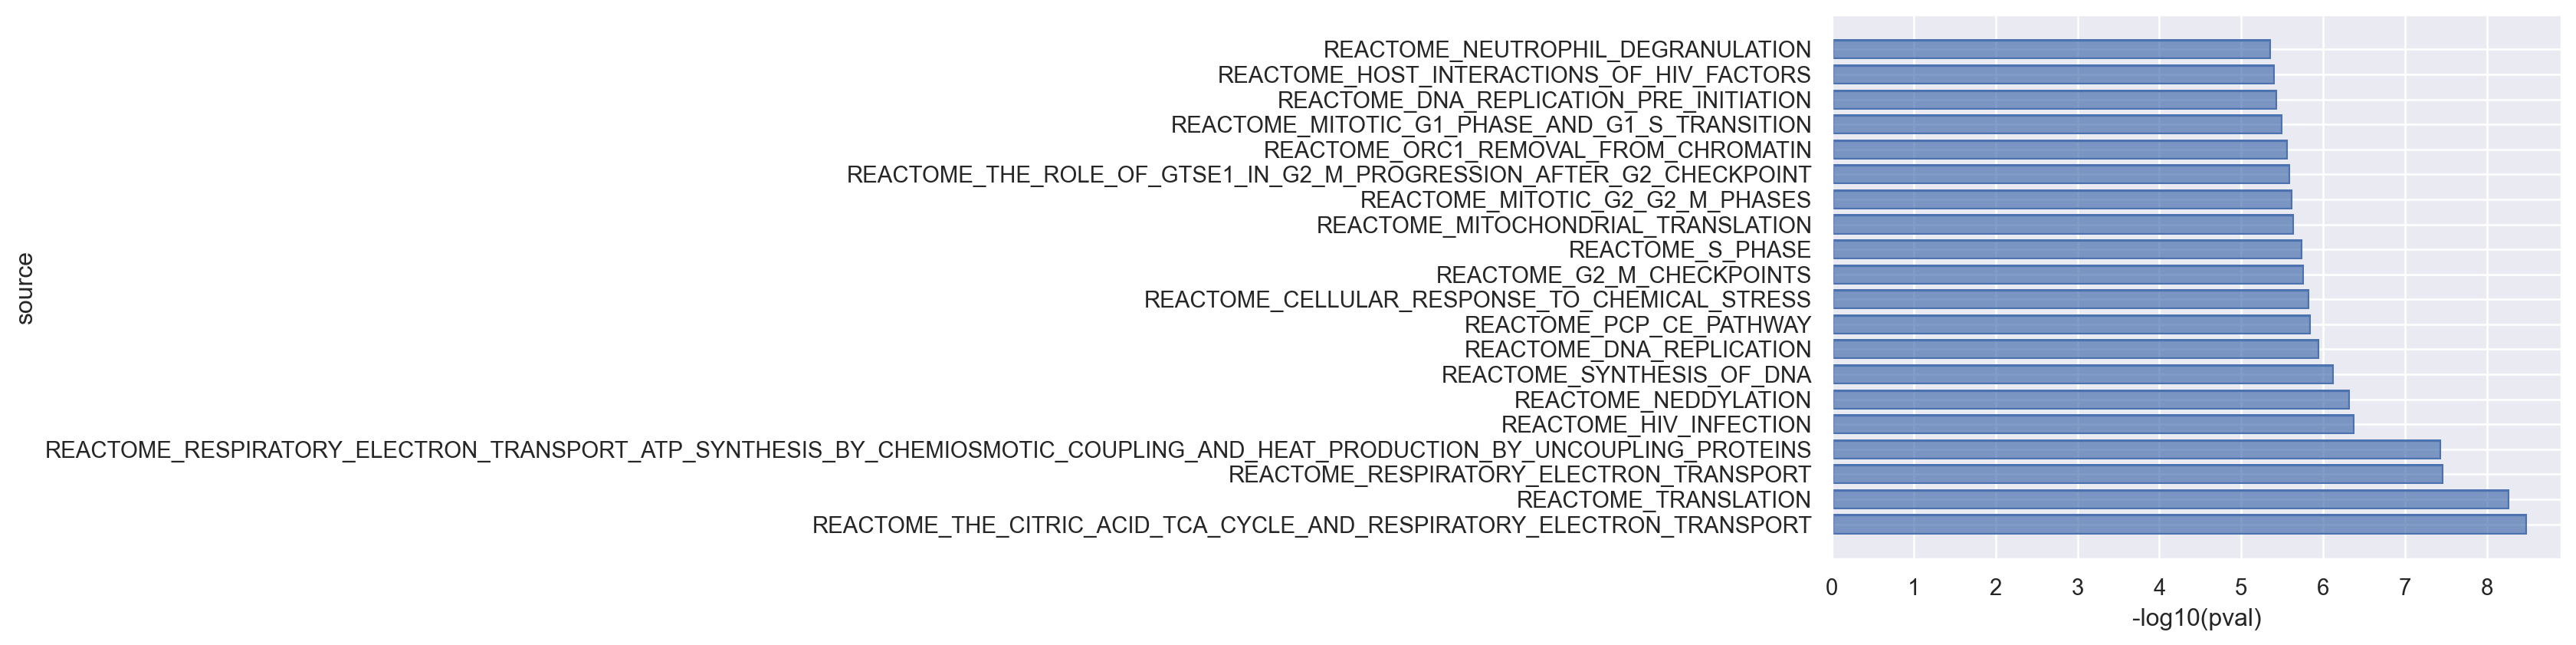

In [33]:
import seaborn.objects as so

(
    so.Plot(
        data=(
            gsea_results.head(20).assign(
                **{"-log10(pval)": lambda x: -np.log10(x["pval"])}
            )
        ),
        x="-log10(pval)",
        y="source",
    ).add(so.Bar())
)

## Cell level pathway activity scoring

In [34]:
%%time
decoupler.run_aucell(
    adata_nk,
    reactome,
    source="geneset",
    target="genesymbol",
    use_raw=False,
)

CPU times: user 29.7 s, sys: 289 ms, total: 30 s
Wall time: 5.12 s


In [35]:
adata_nk

AnnData object with n_obs × n_vars = 1383 × 7175
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1', 'leiden_0.4'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-10', 'highly_variable-10', 'means-10', 'dispe

In [40]:
ifn_pathways = [
    "REACTOME_CYTOKINE_SIGNALING_IN_IMMUNE_SYSTEM",
    "REACTOME_INTERFERON_GAMMA_SIGNALING",
    "REACTOME_SIGNALING_BY_INTERLEUKINS",
]

adata_nk.obs[ifn_pathways] = adata_nk.obsm["aucell_estimate"][ifn_pathways]

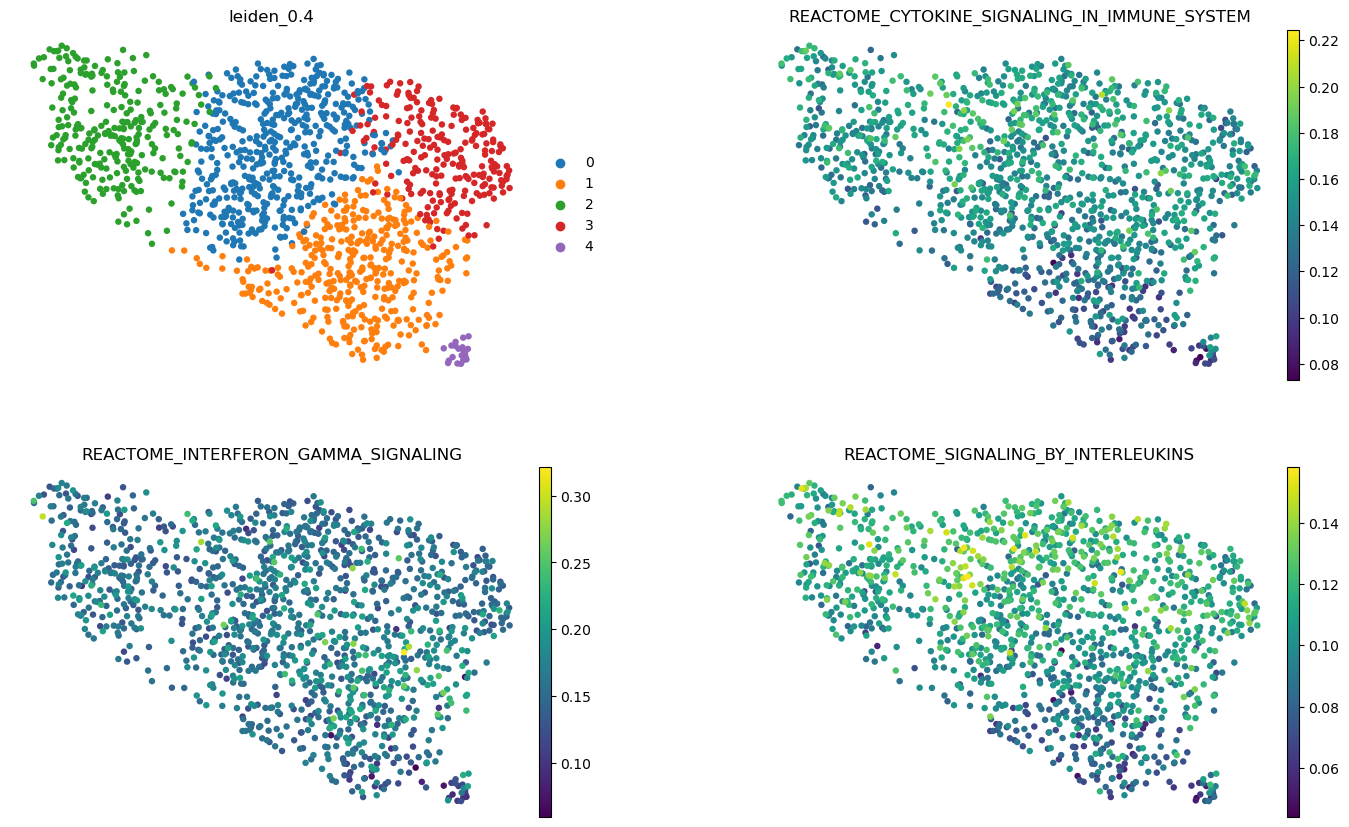

In [41]:
sc.pl.umap(
    adata_nk,
    color=["leiden_0.4"] + ifn_pathways,
    frameon=False,
    ncols=2,
    wspace=0.3,
)